금요일까지 제출
* 멀티레이블 작업
* 오토인코더(텐서)

금요일:
* 1) 오토인코더 등 주제잡고 pytorch로 작업, Tensor로 작업한 내용 Torch로 변환
* 2) Tensorhub 또는 hugging-face또는 교재 gpt 모델

In [1]:
%pwd

'c:\\Users\\openeg\\Downloads'

In [ ]:
%cd ./drive/MyDrive/Task_Multilabel

/content/drive/MyDrive/Task_Multilabel


In [16]:
!unzip -qq "/content/drive/MyDrive/Task_Multilabel/archive (2).zip"

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
DATA_PATH = "./archive"
train_df = pd.read_csv(DATA_PATH + '/train.csv')
test_df = pd.read_csv(DATA_PATH + '/test.csv')
val_df = pd.read_csv(DATA_PATH + '/val.csv')

print(train_df.head())

   Unnamed: 0                                              image  black  blue  \
0           0  ./clothes_dataset\blue_shorts\256d854b55ac32ea...    0.0   1.0   
1           1  ./clothes_dataset\red_pants\584f778aece14f07c2...    0.0   0.0   
2           2  ./clothes_dataset\green_pants\ec543ca241cefb2b...    0.0   0.0   
3           3  ./clothes_dataset\brown_shorts\c8db9e0f7010592...    0.0   0.0   
4           4  ./clothes_dataset\white_dress\551373c80717c5b0...    0.0   0.0   

   brown  green  red  white  dress  shirt  pants  shorts  shoes  
0    0.0    0.0  0.0    0.0    0.0    0.0    0.0     1.0    0.0  
1    0.0    0.0  1.0    0.0    0.0    0.0    1.0     0.0    0.0  
2    0.0    1.0  0.0    0.0    0.0    0.0    1.0     0.0    0.0  
3    1.0    0.0  0.0    0.0    0.0    0.0    0.0     1.0    0.0  
4    0.0    0.0  0.0    1.0    1.0    0.0    0.0     0.0    0.0  


C:\Users\openeg\AppData\Local\Temp\ipykernel_12712\4200818186.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [24]:
type(train_df.columns[2:])

pandas.core.indexes.base.Index

### 2. 이미지 제너레이터 정의 및 모델 구상하기
> 이미지 제너레이터 정의

In [3]:
from keras.preprocessing.image import ImageDataGenerator # Keras에서 이미지 데이터를 처리하기 위한 ImageDataGenerator 모듈을 호출합니다.

train_datagen = ImageDataGenerator(rescale=1. / 255) # 학습 데이터용 이미지 데이터 생성기를 정의하고 이미지의 픽셀을 255로 나누어서 0에서 1사이의 값을 가지도록 정규화해줍니다.
val_datagen = ImageDataGenerator(rescale=1. / 255)

def get_steps(num_samples, batch_size): # 모델의 훈련시에 사용할 batch size를 가변적으로 정의하기 위한 함수
    if (num_samples % batch_size) > 0: # 샘플 수를 batch size로 나눈 크기가 0보다 크다면
        return (num_samples // batch_size) + 1 # 샘플 수를 batch size로 나눈 몫에 1을 더한 값을 반환합니다. 
    else:
        return num_samples // batch_size # 그렇지 않다면 batch size로 나눈 몫을 반환합니다. 이 경우 나머지가 0이므로 추가적인 batch는 필요하지 않습니다. 

dropout와 l1, l2 규제 적용해보기

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
model.add(Flatten(input_shape = (112, 112, 3))) # (112, 112, 3) -> (112 * 112 * 3)
 # in: (112, 112, 3) w: flatten 층이므로 없음 out: (37632, )
model.flatten()
model.add(Dense(128, activation = 'relu')) # 128개의 출력을 가지는 Dense 층
 # in: (37632, ) w: (37632, 128) out: (128,)
model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense 층
 # in: (128, ) w: (128, 64) out: (64, )
model.add(Dense(11, activation = 'sigmoid')) # 11개의 출력을 가지는 신경망
    # in: (64, ) w: (64, 11) out: (11, )
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

# 각 레이어의 input, weight, output의 shape 출력
for layer in model.layers:
    print("레이어 이름:", layer.name)
    print("입력 모양:", layer.input_shape)
    print("가중치 모양:", layer.get_weights()[0].shape if layer.get_weights() else None)
    print("출력 모양:", layer.output_shape)
    print()

레이어 이름: flatten_3
입력 모양: (None, 112, 112, 3)
가중치 모양: None
출력 모양: (None, 37632)

레이어 이름: dense_10
입력 모양: (None, 37632)
가중치 모양: (37632, 128)
출력 모양: (None, 128)

레이어 이름: dense_11
입력 모양: (None, 128)
가중치 모양: (128, 64)
출력 모양: (None, 64)

레이어 이름: dense_12
입력 모양: (None, 64)
가중치 모양: (64, 11)
출력 모양: (None, 11)



In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
model.add(Flatten(input_shape = (112, 112, 3))) # (112, 112, 3) -> (112 * 112 * 3)
#  # in: (112, 112, 3) w: flatten 층이므로 없음 out: (37632, )
# model.add(Dense(128, activation = 'relu')) # 128개의 출력을 가지는 Dense 층
#  # in: (37632, ) w: (37632, 128) out: (128,)
model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense 층
#  # in: (128, ) w: (128, 64) out: (64, )
model.add(Dense(11, activation = 'sigmoid')) # 11개의 출력을 가지는 신경망
    # in: (64, ) w: (64, 11) out: (11, )
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

# 각 레이어의 input, weight, output의 shape 출력
for layer in model.layers:
    print("레이어 이름:", layer.name)
    print("입력 모양:", layer.input_shape)
    print("가중치 모양:", layer.get_weights()[0].shape if layer.get_weights() else None)
    print("출력 모양:", layer.output_shape)
    print()

레이어 이름: flatten
입력 모양: (None, 112, 112, 3)
가중치 모양: None
출력 모양: (None, 37632)

레이어 이름: dense
입력 모양: (None, 37632)
가중치 모양: (37632, 64)
출력 모양: (None, 64)

레이어 이름: dense_1
입력 모양: (None, 64)
가중치 모양: (64, 11)
출력 모양: (None, 11)



In [ ]:
%pwd

'/content/drive/MyDrive/Task_Multilabel'

**역 슬래시 기호를 "/"로 변경**

In [4]:
train_df['image'][0] # '\'기호를 인식하지 못하여 이미지가 저장된 경로에 접근하지 못하는 문제 발생

'./clothes_dataset\\blue_shorts\\256d854b55ac32ea4d0d6398dffccc4d8909a388.jpg'

In [5]:
train_df['image'] = train_df['image'].apply(lambda x: x.replace('/', '\\'))
train_df.head() # lambda 함수를 사용하여 dataframe 내의 역슬래시 기호를 '/'로 변환하였습니다.

,Unnamed: 0,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,0,.\clothes_dataset\blue_shorts\256d854b55ac32ea...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,.\clothes_dataset\red_pants\584f778aece14f07c2...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,.\clothes_dataset\green_pants\ec543ca241cefb2b...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,.\clothes_dataset\brown_shorts\c8db9e0f7010592...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,.\clothes_dataset\white_dress\551373c80717c5b0...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [6]:
val_df['image'] = train_df['image'].apply(lambda x: x.replace('/', '\\'))
test_df['image'] = test_df['image'].apply(lambda x: x.replace('/', '\\'))

val_df.head()

,Unnamed: 0,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,0,.\clothes_dataset\blue_shorts\256d854b55ac32ea...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,.\clothes_dataset\red_pants\584f778aece14f07c2...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,.\clothes_dataset\green_pants\ec543ca241cefb2b...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,.\clothes_dataset\brown_shorts\c8db9e0f7010592...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,.\clothes_dataset\white_dress\551373c80717c5b0...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [23]:
train_df.columns[2:] # target data를 위해 train_dataframe의 columns를 list로 변환하였습니다. 

Index(['black', 'blue', 'brown', 'green', 'red', 'white', 'dress', 'shirt',
       'pants', 'shorts', 'shoes'],
      dtype='object')

In [7]:
# Make Generator
batch_size = 8
train_generator = train_datagen.flow_from_dataframe( # 데이터프레임에서 이미지 데이터를 가져오는 제너레이터를 생성합니다.
    dataframe=train_df, # 이미지 데이터를 포함하고 있는 데이터프레임을 정의합니다.
    directory='./archive', # 이미지 파일을 불러올 경로를 정의합니다. 
    x_col = 'image', # 이미지 파일의 경로(train_df의 image column에 적힌 이미지 경로)
    y_col = list(train_df.columns[2:]), # 이미지와 클래스 분류를 수행하기 위한 열 목록을 지정합니다.
    target_size = (112, 112), # 입력 이미지의 크기를 지정합니다. (224, 224)로 테스트 해봤는데 학습 속도가 너무 오래 걸리는 문제를 확인했습니다. 
    color_mode='rgb', # 이미지의 색상 모드를 R,G,B 3개의 채널로 지정합니다. 
    class_mode='raw', # 클래스 모드를 지정합니다. 이 경우에는 다중 클래스 분류 문제를 다루고 있으므로 'other'로 설정합니다. 
    batch_size=batch_size, # batch의 크기를 지정합니다. 정밀한 학습을 위해 8로 지정했습니다. 
    seed=42 # 난수 생성 알고리즘의 초기값을 지정합니다. 학습 과정을 재현하기 위해 데이터를 섞지 않고 seed 값을 고정합니다. 
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='./archive',
    x_col = 'image',
    y_col = list(val_df.columns[2:]),
    target_size = (112, 112),
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size,
    shuffle=True
)

len(train_generator)

Found 5578 validated image filenames.
Found 2391 validated image filenames.


698

In [8]:
history = model.fit(train_generator,
         steps_per_epoch=get_steps(len(train_df), batch_size), # 전체 데이터의 길이와 batch 사이즈의 크기를 비교하여 epoch 횟수를 할당합니다. 
         validation_data = val_generator, # 검증 데이터를 사용하여 학습 데이터에 대한 과적합을 방지하고, 모델의 성능을 모니터링하며 하이퍼퍼라미터를 조정합니다. 
         validation_steps=get_steps(len(val_df), batch_size),
         epochs = 40)

Epoch 1/40
698/698 [==============================] - 16s 22ms/step - loss: 0.5313 - acc: 0.2193 - val_loss: 0.5779 - val_acc: 0.1117
Epoch 2/40
698/698 [==============================] - 15s 22ms/step - loss: 0.4036 - acc: 0.1045 - val_loss: 0.5947 - val_acc: 0.0318
Epoch 3/40
698/698 [==============================] - 15s 22ms/step - loss: 0.3723 - acc: 0.0762 - val_loss: 0.7337 - val_acc: 0.0452
Epoch 4/40
698/698 [==============================] - 15s 22ms/step - loss: 0.3538 - acc: 0.1067 - val_loss: 0.7489 - val_acc: 0.0335
Epoch 5/40
698/698 [==============================] - 16s 22ms/step - loss: 0.3437 - acc: 0.1804 - val_loss: 0.7208 - val_acc: 0.0548
Epoch 6/40
698/698 [==============================] - 16s 22ms/step - loss: 0.3329 - acc: 0.2297 - val_loss: 0.7972 - val_acc: 0.1138
Epoch 7/40
698/698 [==============================] - 15s 22ms/step - loss: 0.3300 - acc: 0.2608 - val_loss: 0.8175 - val_acc: 0.1125
Epoch 8/40
698/698 [==============================] - 15s 22ms

### 레이어의 수를 줄였더니(Dropout말고 물리적으로) 성능이 미세하게 향상되는 것 확인

In [8]:
history = model.fit(train_generator, # 레이어 1개
         steps_per_epoch=get_steps(len(train_df), batch_size), # 전체 데이터의 길이와 batch 사이즈의 크기를 비교하여 epoch 횟수를 할당합니다. 
         validation_data = val_generator, # 검증 데이터를 사용하여 학습 데이터에 대한 과적합을 방지하고, 모델의 성능을 모니터링하며 하이퍼퍼라미터를 조정합니다. 
         validation_steps=get_steps(len(val_df), batch_size),
         epochs = 20)

Epoch 1/20
698/698 [==============================] - 44s 62ms/step - loss: 0.5131 - acc: 0.2551 - val_loss: 0.6945 - val_acc: 0.0519
Epoch 2/20
698/698 [==============================] - 15s 21ms/step - loss: 0.3634 - acc: 0.3530 - val_loss: 0.8460 - val_acc: 0.1221
Epoch 3/20
698/698 [==============================] - 15s 21ms/step - loss: 0.3088 - acc: 0.4953 - val_loss: 0.9479 - val_acc: 0.1476
Epoch 4/20
698/698 [==============================] - 15s 22ms/step - loss: 0.2774 - acc: 0.5746 - val_loss: 1.0165 - val_acc: 0.1380
Epoch 5/20
698/698 [==============================] - 15s 22ms/step - loss: 0.2666 - acc: 0.5934 - val_loss: 1.0273 - val_acc: 0.1372
Epoch 6/20
698/698 [==============================] - 15s 22ms/step - loss: 0.2705 - acc: 0.5895 - val_loss: 1.0563 - val_acc: 0.1380
Epoch 7/20
698/698 [==============================] - 15s 22ms/step - loss: 0.2559 - acc: 0.5961 - val_loss: 1.0750 - val_acc: 0.1489
Epoch 8/20
698/698 [==============================] - 15s 21ms

### 모델 성능 그래프

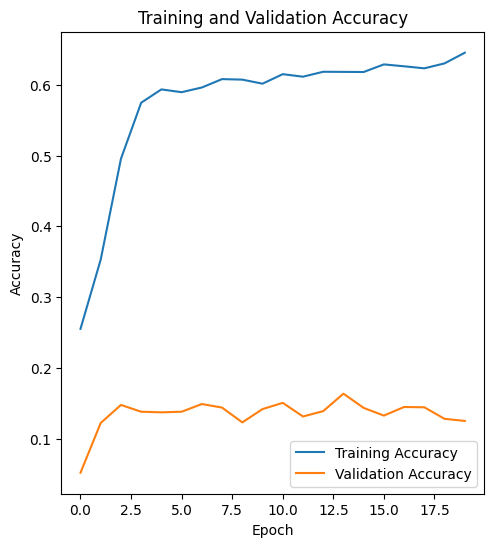

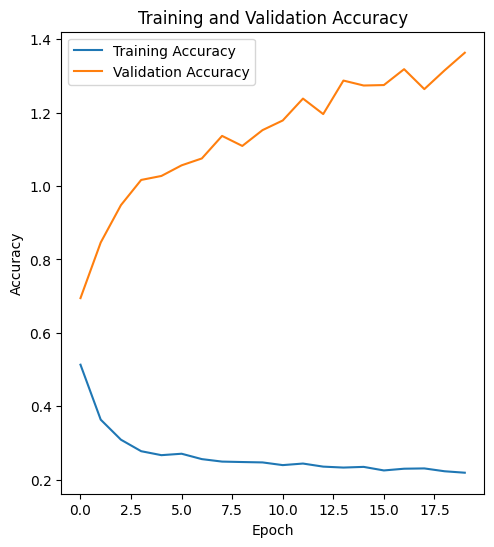

In [9]:
import matplotlib.pyplot as plt
hist = history.history
# 훈련 및 검증 정확도 데이터 추출
train_acc, train_loss = hist['acc'], hist['loss']
val_acc, val_loss = hist['val_acc'], hist['val_loss']

# 정확도 그래프 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()  # 범례 표시
plt.show()

# 정확도 그래프 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Accuracy')
plt.plot(val_loss, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()  # 범례 표시
plt.show()

In [10]:
# 6. 모델 저장하기
import os
save_path = os.path.join('model', 'img_generator_light_model.h5')
model.save(save_path)

In [ ]:
test_df['image'].tolist()

In [11]:
from keras.models import load_model

# 모델 파일 경로
model_path = r'C:\Users\openeg\Downloads\model\img_generator_light_model.h5'
# r'C:\Users\openeg\Downloads\model\img_generator_model.h5'

# 모델 로드
model = load_model(model_path)

In [13]:
%cd ./archive

c:\Users\openeg\Downloads\archive


### 클래스화

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

class ImagePredictor: # 이미지 예측기 클래스를 정의합니다. 
    def __init__(self, model, test_df): # 이미지 예측기 클래스의 생성자를 지정합니다. model과 test_dataframe을 인수로 받습니다. 
        self.model = model # 인스턴스 변수 model을 할당합니다.
        self.test_df = test_df # 인스턴스 변수에 test_dataframe을 할당합니다. 

    def predict_and_visualize(self, num_images=8): # 이미지를 예측하고 시각화하는 메서드를 정의합니다. 
        preds = [] # 예측 결과를 저장할 빈 리스트를 생성합니다. 
        test_image_paths = self.test_df['image'].tolist() # test_dataframe에서 이미지 경로를 가져와 iterable한 리스트로 변환합니다. 

        plt.figure(figsize=(12, 6)) # 이미지를 시각화하기 위한 plot을 생성합니다. 

        for i, img_path in enumerate(test_image_paths[:num_images]): # 지정한 num_images 수만큼의 이미지를 보여줍니다. 
            image = cv2.imread(img_path) # OPENCV 라이브러리를 사용하여 이미지를 읽어옵니다. 
            image = cv2.resize(image, (112, 112)) # 입력 데이터 사이즈를 변환합니다. 학습한 모델의 입력 사이즈와 동일하게 설정합니다.  
            image = image.astype(np.float32) / 255.0 # 이미지의 픽셀 값을 float 타입으로 변환합니다 (pixel.)
            image = np.expand_dims(image, axis=0) # array 연산을 하기 위해 이미지를 numpy array로 변환하고, 축을 할당하여 batch의 차원을 만듭니다.
                                                    #  이는 이미지를 하나의 배치로 간주함을 의미합니다.  

            pred = self.model.predict(image) # 모델을 사용하여 이미지를 예측합니다. 
            preds.append(pred)

            classes = list(self.test_df.columns[2:]) # 클래스 라벨을 가져와 리스트로 변환합니다.
            top_classes = np.argsort(pred[0])[::-1][:2] # 가장 높은 확률을 갖는 상위 2개 클래스의 인덱스를 가져옵니다.
            top_probs = pred[0][top_classes]  # 예측 확률 중 상위 클래스에 해당하는 확률을 가져옵니다.
            top_class_names = [classes[idx] for idx in top_classes] # 상위 클래스와 대응하는 클래스 값을 가져옵니다.

            plt.subplot(2, 4, i + 1) # 이미지를 시각화할 서브플롯을 생성합니다. 이미지가 8개 이므로 2행 4열
            plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)) # openCV의 채널 구조인 BGR을 RGB로 변환하여 plot에 출력합니다. 
            plt.title(f'{top_class_names[0]}: {top_probs[0]:.2f}, {top_class_names[1]}: {top_probs[1]:.2f}') # 서브 플롯의 제목을 설정합니다. 예측 결과와 확률을 표시합니다. 

        plt.tight_layout()
        plt.show()

# ImagePredictor 객체 생성
predictor = ImagePredictor(model, test_df)
# 이미지 예측 및 시각화
predictor.predict_and_visualize()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


<Figure size 1200x600 with 0 Axes>

In [49]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 예측값을 저장할 리스트
preds = []
test_image_paths = test_df['image'].tolist()

# 이미지와 예측값을 함께 시각화
plt.figure(figsize=(12, 6))

# 상위 8개 이미지에 대해 예측 및 시각화
for i, img_path in enumerate(test_image_paths[:8]):
    # 이미지 전처리
    image = cv2.imread(img_path)
    image = cv2.resize(image, (112, 112))  # 이미지 크기 조정
    image = image.astype(np.float32) / 255.0  # 이미지 스케일 조정
    image = np.expand_dims(image, axis=0)  # 배치 차원 추가

    # 이미지를 모델에 입력하여 예측값 얻기
    pred = model.predict(image)
    preds.append(pred)

    # 예측 결과와 해당 클래스의 확률 표시
    classes = list(train_df.columns[2:])
    top_classes = np.argsort(pred[0])[::-1][:2]  # 확률이 가장 높은 상위 2개 클래스 인덱스
    top_probs = pred[0][top_classes]  # 상위 2개 클래스에 대한 확률
    top_class_names = [classes[idx] for idx in top_classes]  # 상위 2개 클래스의 이름

    # 이미지를 시각화
    plt.subplot(2, 4, i + 1)
    plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))  # 이미지를 RGB 형식으로 변환하여 시각화
    plt.title(f'{top_class_names[0]}: {top_probs[0]:.2f}, {top_class_names[1]}: {top_probs[1]:.2f}')  # 상위 2개 클래스와 확률 표시

plt.tight_layout()
plt.show()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


<Figure size 1200x600 with 0 Axes>

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, SeparableConv2D
from tensorflow.keras.applications import ResNet50

class MyModel(tf.keras.Model):
    def __init__(self, num_classes):
        super(MyModel, self).__init__()
        self.model = Sequential()
        self.flatten = Flatten()
        # self.depthwise_conv = SeparableConv2D(64, kernel_size=(3, 3), activation='relu', padding='same')

        # self.dense1 = Dense(128, activation='relu')
        # self.dense2 = Dense(64, activation='relu')
        # self.dense3 = Dropout(0.3)
        self.dense4 = Dense(32, activation='relu')
        self.dense5 = Dropout(0.3)
        self.dense6 = Dense(num_classes, activation='sigmoid')

    def call(self, inputs):
        x = self.model(inputs)
        x = self.flatten(x)
        # x = self.dense1(x)
        # x = self.dense2(x)
        # x = self.dense3(x)
        # x = self.dense4(x)
        x = self.dense5(x)
        return self.dense6(x)

# 이미지 제너레이터 객체 생성 및 데이터셋 로드
train_generator = train_generator 
val_generator = val_generator

# 모델 생성
model = MyModel(num_classes=11)

# 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(train_generator,
                    steps_per_epoch=get_steps(len(train_df), batch_size), 
                    validation_data=val_generator,
                    validation_steps=get_steps(len(val_df), batch_size),
                    epochs=20)


Epoch 1/20
698/698 [==============================] - 16s 22ms/step - loss: 0.9222 - accuracy: 0.3767 - val_loss: 3.0434 - val_accuracy: 0.0970
Epoch 2/20
698/698 [==============================] - 15s 21ms/step - loss: 0.8366 - accuracy: 0.4532 - val_loss: 3.7241 - val_accuracy: 0.1317
Epoch 3/20
698/698 [==============================] - 15s 21ms/step - loss: 0.8612 - accuracy: 0.4776 - val_loss: 4.4471 - val_accuracy: 0.1861
Epoch 4/20
698/698 [==============================] - 14s 21ms/step - loss: 0.9014 - accuracy: 0.4846 - val_loss: 5.0071 - val_accuracy: 0.1150
Epoch 5/20
698/698 [==============================] - 15s 21ms/step - loss: 0.8903 - accuracy: 0.4968 - val_loss: 5.0619 - val_accuracy: 0.1531
Epoch 6/20
629/698 [==========================>...] - ETA: 1s - loss: 0.8275 - accuracy: 0.5008

KeyboardInterrupt: 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D 모델 데이터를 로드합니다.
def load_3d_model_data(file_path):
    # 파일에서 데이터를 로드합니다. (파일 형식 및 데이터 구조에 따라 적절한 방법을 사용하세요)
    # 예시로 numpy 배열로 가정합니다.
    model_data = np.load(file_path)
    return model_data

# 3D 모델 데이터를 시각화합니다.
def visualize_3d_model(model_data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # 모델 데이터에서 x, y, z 좌표를 추출합니다.
    x, y, z = model_data[:, 0], model_data[:, 1], model_data[:, 2]
    
    # 3D 산점도를 생성하여 시각화합니다.
    ax.scatter(x, y, z, c=z, cmap='viridis')  # z 좌표를 색상으로 표시합니다.
    
    # 각 축의 레이블을 추가합니다.
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.show()

# 3D 모델 데이터 파일 경로
model_file_path = r'C:\Users\openeg\Downloads\RangeRoverSportOBJ'

# 3D 모델 데이터를 로드합니다.
model_data = load_3d_model_data(model_file_path)

# 시각화 함수를 사용하여 3D 모델을 시각화합니다.
visualize_3d_model(model_data)


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\openeg\\Downloads\\RangeRoverSportOBJ'